In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm 

In [2]:
J = -1

In [3]:
# Definiendo el array inicial

def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

In [4]:
N = 10
M = 10
sigma = random_spin_field(N,M)
print(sigma)

[[-1 -1  1 -1 -1 -1  1  1  1  1]
 [-1  1  1  1  1  1  1  1  1  1]
 [-1  1 -1  1  1  1  1  1  1  1]
 [-1  1 -1 -1  1 -1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1 -1  1 -1  1  1]
 [-1  1 -1 -1  1  1  1 -1  1  1]
 [-1 -1 -1  1  1  1 -1  1 -1 -1]
 [ 1 -1  1  1  1  1 -1 -1  1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1 -1 -1  1 -1  1]]


In [5]:
def GetEnergy(sigma, B):
    
    n = sigma.shape[0]
    m = sigma.shape[1]
    
    energy = 0.
     
    for i in range(n):
        for j in range(m):
            
            right = i+1
            if i == n-1:
                right = 0
                
            left = i-1
           
            up = j+1
            if j == m-1:
                up = 0
                
            down = j-1
            
            energy += 0.5*J*sigma[i,j]*\
            (sigma[right,j]+sigma[left,j]+sigma[i,up]+sigma[i,down])
            
            # Magnetic Field
            energy -= 0.5*B*sigma[i,j]
    
    return energy

In [6]:
def GetMagnetization(sigma):
    return np.sum(sigma.ravel())/float(M*N)

In [7]:
print(GetEnergy(sigma,0), GetMagnetization(sigma))

(-24.0, 0.16)


In [8]:
# Implementamos metropolis

def _ising_step(sigma, T, B):
    
    beta = 1./T
    
    current = sigma.copy()
    energy1 = GetEnergy(current, B)
    
    # Calcular una posición en el array
    x = randint(0,sigma.shape[0]-1)
    y = randint(0,sigma.shape[1]-1)
    
    future = current.copy()
    future[x,y] = current[x,y]*(-1)
    
    energy2 = GetEnergy(future, B)
    
    dE = energy2-energy1
    
    r =  np.random.rand()   
    
    if dE < 0.:
        return future
        
    elif r < np.exp(- dE * beta):
        return future
    
    else:
        return current

In [9]:
Energy = []
Energy2 = []
Magnetization = []

T = 2.0
B = 0.
Ntoys = 20000

sigma_ = sigma.copy()

for i in tqdm(range(Ntoys)):
    sigma_ = _ising_step(sigma_,T,B)
    
    if i >= 5000:
        energy = GetEnergy(sigma_,B)
        magnetization = GetMagnetization(sigma_)
        
        Energy.append(energy)
        Energy2.append(energy**2)
        Magnetization.append(magnetization)

100%|██████████| 20000/20000 [00:10<00:00, 1852.99it/s]


In [10]:
e = np.average(Energy)
e2 = np.average(Energy2)
m = np.average(Magnetization)

cv = (e2 - e**2)/(T**2)

print(e/float(M*N),m,cv/float(M*N))

(-1.7472506666666667, 0.9151146666666667, 0.5574590291555614)


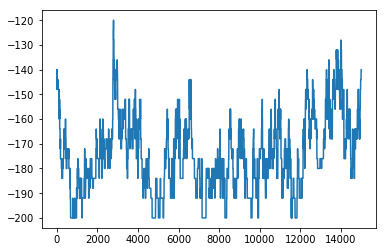

In [11]:
plt.figure()
plt.plot(Energy)

(array([1039., 2156., 3336., 3040., 2443., 1542.,  815.,  478.,  117.,
          34.]),
 array([-200., -192., -184., -176., -168., -160., -152., -144., -136.,
        -128., -120.]),
 <a list of 10 Patch objects>)

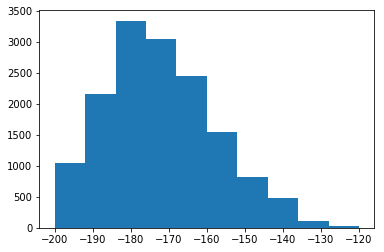

In [12]:
plt.figure()
plt.hist(Energy, bins=10)

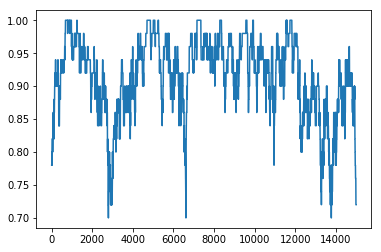

In [13]:
plt.figure()
plt.plot(Magnetization)

(array([ 129.,  132.,  425.,  223., 1082., 1083., 2933., 1995., 4263.,
        2735.]),
 array([0.7 , 0.73, 0.76, 0.79, 0.82, 0.85, 0.88, 0.91, 0.94, 0.97, 1.  ]),
 <a list of 10 Patch objects>)

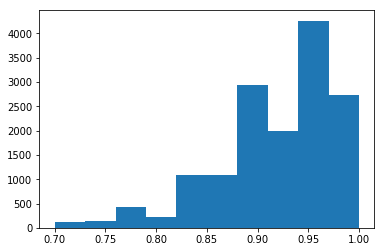

In [14]:
plt.figure()
plt.hist(Magnetization, bins=10)

In [15]:
# Ahora vamos a variar las temperaturas

def GetValues(T, B, Ntoys = 20000):
    
    sigma_ = sigma.copy()
    
    Energy = []
    Energy2 = []
    Magnetization = []
    
    for i in tqdm(range(Ntoys)):
   
        sigma_ = _ising_step(sigma_,T,B)

        if i >= 5000:
            energy = GetEnergy(sigma_, B)
            magnetization = GetMagnetization(sigma_)
            Energy.append(energy)
            Energy2.append(energy**2)
            Magnetization.append(magnetization)
            
    e = np.average(Energy)
    e2 = np.average(Energy2)
    m = np.average(Magnetization)

    cv = (e2 - e**2)/T**2   
    
    return e/float(M*N),m,cv/float(M*N)   

In [16]:
T = np.arange(1.0,3.0,0.2)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in range(len(T)):
    Energy[t], Mag[t], Cv[t] = GetValues(T[t],0)
    print(T[t], Energy[t], abs(Mag[t]), Cv[t])

  1%|          | 228/20000 [00:00<00:08, 2278.04it/s]

(1.0, -1.9963306666666667, 0.9990826666666667, 0.02800826595550461)


  1%|          | 249/20000 [00:00<00:07, 2488.85it/s]

(1.2, -1.9893706666666668, 0.9973426666666666, 0.0609836069135478)


  1%|          | 242/20000 [00:00<00:08, 2419.13it/s]

(1.4, -1.966576, 0.9908133333333334, 0.14749708625848665)


  1%|          | 233/20000 [00:00<00:08, 2328.25it/s]

(1.5999999999999999, -1.9459413333333333, 0.9855386666666668, 0.15522944888891746)


  1%|          | 240/20000 [00:00<00:08, 2399.18it/s]

(1.7999999999999998, -1.8528693333333335, 0.9554960000000001, 0.43313683928670493)


  1%|▏         | 259/20000 [00:00<00:07, 2586.38it/s]

(1.9999999999999998, -1.7788266666666666, 0.927812, 0.5255549155555583)


  1%|          | 244/20000 [00:00<00:08, 2434.77it/s]

(2.1999999999999997, -1.5800453333333335, 0.8431040000000001, 0.7849784699357154)


  1%|▏         | 265/20000 [00:00<00:07, 2648.33it/s]

(2.3999999999999995, -1.4039653333333333, 0.7238146666666667, 1.3051214606172854)


  1%|          | 249/20000 [00:00<00:07, 2486.22it/s]

(2.5999999999999996, -1.0662186666666666, 0.06584800000000002, 0.5329064327153187)


100%|██████████| 20000/20000 [00:10<00:00, 1872.54it/s]

(2.8, -0.9342586666666667, 0.2866933333333333, 0.5992965615419518)


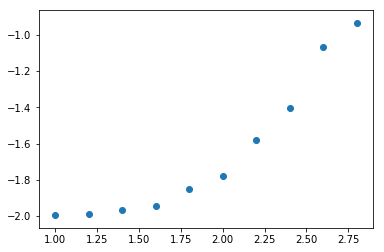

In [17]:
plt.figure()
plt.scatter(T,Energy)

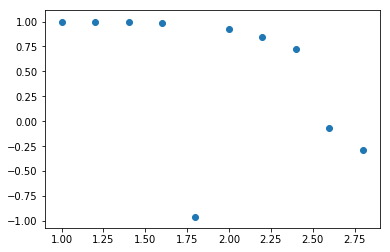

In [18]:
plt.figure()
plt.scatter(T,Mag)

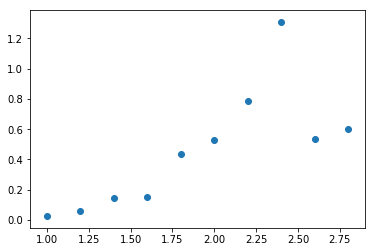

In [19]:
plt.figure()
plt.scatter(T,Cv)

# Ahora estudiemos el efecto del campo magnetico

In [32]:
T = 3.0

B = np.arange(-1.0,1.2,0.2)

Energy = np.zeros(len(B))
Mag = np.zeros(len(B))
Cv = np.zeros(len(B))

for b in range(len(B)):
    Energy[b], Mag[b], Cv[b] = GetValues(T,B[b])
    print(B[b], Energy[b], Mag[b])

  2%|▏         | 187/10000 [00:00<00:05, 1859.37it/s]

(-1.0, -1.7372442857142858, -0.7707628571428572)


  2%|▏         | 211/10000 [00:00<00:04, 2102.52it/s]

(-0.8, -1.635209142857145, -0.7556657142857143)


  2%|▏         | 215/10000 [00:00<00:04, 2149.96it/s]

(-0.6000000000000001, -1.376902857142857, -0.6673142857142859)


  2%|▏         | 197/10000 [00:00<00:05, 1956.73it/s]

(-0.40000000000000013, -1.1405017142857148, -0.5053942857142858)


  2%|▏         | 203/10000 [00:00<00:04, 2028.96it/s]

(-0.20000000000000018, -0.9754305714285708, -0.3969914285714286)


  2%|▏         | 203/10000 [00:00<00:04, 2019.20it/s]

(-2.220446049250313e-16, -0.7582057142857143, -0.11215714285714287)


  2%|▏         | 211/10000 [00:00<00:04, 2109.49it/s]

(0.19999999999999973, -0.8762208571428569, 0.32786571428571426)


  2%|▏         | 202/10000 [00:00<00:04, 2016.37it/s]

(0.3999999999999997, -1.0560794285714292, 0.41834)


  2%|▏         | 207/10000 [00:00<00:04, 2066.32it/s]

(0.5999999999999996, -1.464035714285714, 0.7237571428571429)


  2%|▏         | 197/10000 [00:00<00:05, 1960.18it/s]

(0.7999999999999996, -1.6040525714285738, 0.7484457142857143)


100%|██████████| 10000/10000 [00:07<00:00, 1402.68it/s]

(0.9999999999999996, -1.8105785714285714, 0.7979)


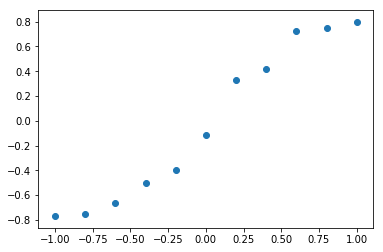

In [33]:
plt.figure()
plt.scatter(B,Mag)